In [25]:
!date

Sat Oct 23 18:58:13 PDT 2021


# Comparison between control and experiment datasets for HVC-X / HVC-RA neurons
#### Unfiltered data obtained from using kb with multimapping function. Ref genome includes WRE.

___

In [26]:
%config InlineBackend.figure_format = 'retina'
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [27]:
import sys
import anndata
# import scvi

import scanpy as sc
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import pandas as pd

sc.set_figure_params(figsize=(6, 6), frameon=False)
sc.settings.n_jobs=2

In [28]:
# set random seed
np.random.seed(926)

In [29]:
def nd(arr):
    """
    Funciton to transform numpy matrix to nd array.
    """
    return np.asarray(arr).reshape(-1)

___

# Load AnnData object

In [30]:
adata = anndata.read_h5ad("../../finchseq_data/all_celltype_hvcxra.h5ad")
adata

AnnData object with n_obs × n_vars = 2846 × 22151
    obs: 'species', 'batch', 'n_counts_processed', 'batch_index', 'n_counts_raw', 'leiden', 'celltype', 'connectivity', 'connectivity_v2'
    var: 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'celltype_colors', 'connectivity_colors', 'connectivity_v2_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

___

# Load marker genes

In [31]:
marker_gene_mat = pd.read_excel('marker_genes.xlsx', sheet_name="matrix_v2")

Find gene ID for each gene:

In [32]:
marker_gene_mat["gene_name_id"] = np.arange(len(marker_gene_mat))

In [33]:
# index counter
i = 0

for gene in marker_gene_mat["Gene"].values:
    gene_name_id = []
    
    if gene.startswith("ENS"):
        gni = adata.var.iloc[np.where(adata.var.index.str.contains(gene))]
    
    else:
        gni = adata.var.iloc[np.where(adata.var.index.str.startswith(gene))]

    if len(gni) > 0:
        gene_name_id = gni.index[0]
    else:
        gene_name_id = np.nan

    marker_gene_mat["gene_name_id"][i] = gene_name_id
    i += 1

/home/lauraluebbert/bin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/lauraluebbert/bin/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### !!! Check which/if genes were found correctly:

In [34]:
marker_gene_mat[["Gene", "gene_name_id"]]

Gene                    gene_name_id
0              SLC15A2    SLC15A2_ENSTGUG00000026244.1
1                SPEF2      SPEF2_ENSTGUG00000001981.2
2                 PLP1       PLP1_ENSTGUG00000006519.2
3                CSF1R      CSF1R_ENSTGUG00000000965.2
4                 FLI1       FLI1_ENSTGUG00000020175.1
5                 RGS5       RGS5_ENSTGUG00000019064.1
6                  LUM        LUM_ENSTGUG00000008175.2
7                 HBAD       HBAD_ENSTGUG00000004381.2
8              SLC17A6    SLC17A6_ENSTGUG00000004570.2
9                 GAD1       GAD1_ENSTGUG00000008060.2
10                GAD2       GAD2_ENSTGUG00000001148.2
11               NR2E1      NR2E1_ENSTGUG00000012147.2
12                 DCX        DCX_ENSTGUG00000006180.2
13             NECTIN3    NECTIN3_ENSTGUG00000013600.2
14                TBR1       TBR1_ENSTGUG00000006709.2
15               FABP7      FABP7_ENSTGUG00000011826.2
16              NOTCH2     NOTCH2_ENSTGUG00000017231.2
17               UTS2B      UTS2B_ENSTGUG00000009278.2
18              HPCAL1     HPCAL1_ENSTGUG00000013044.2
19                 DCN        DCN_ENSTGUG00000008178.2
20                 NTS        NTS_ENSTGUG00000027877.1
21             ALDH1A2    ALDH1A2_ENSTGUG00000006178.2
22               FNDC9      FNDC9_ENSTGUG00000000654.2
23              COL6A3     COL6A3_ENSTGUG00000003667.2
24              NFATC1     NFATC1_ENSTGUG00000006621.2
25            ADAMTS18   ADAMTS18_ENSTGUG00000009163.2
26                 VIM        VIM_ENSTGUG00000001298.2
27                BDNF       BDNF_ENSTGUG00000004743.2
28               FOSL2      FOSL2_ENSTGUG00000024611.1
29              HOMER1     HOMER1_ENSTGUG00000003711.2
30  ENSTGUG00000007756           _ENSTGUG00000007756.2
31                SOX4                             NaN
32             or107-1                             NaN
33              EJZER1                             NaN
34               AR46s                             NaN
35                 DDC        DDC_ENSTGUG00000007930.2
36                 DBH        DBH_ENSTGUG00000005640.2
37               CASP3      CASP3_ENSTGUG00000006682.2
38               AIFM1      AIFM1_ENSTGUG00000005167.2
39                MCU_        MCU_ENSTGUG00000004428.2
40           TNFAIP8L3  TNFAIP8L3_ENSTGUG00000028388.1
41                EGR1       EGR1_ENSTGUG00000000003.2
42                E2F1       E2F1_ENSTGUG00000028557.1
43                MCM2       MCM2_ENSTGUG00000008031.2
44                MCM3       MCM3_ENSTGUG00000013275.2
45                MCM4       MCM4_ENSTGUG00000010897.2
46                MCM5       MCM5_ENSTGUG00000010831.2
47                MCM6       MCM6_ENSTGUG00000011790.2
48                PCNA       PCNA_ENSTGUG00000004036.2
49  ENSTGUG00000021193           _ENSTGUG00000021193.1

Notes on the marker genes:  
FNDC9 is a synonym for FNTM2 (HVC-X marker).  
PDGFRA (ENSTGUG00000007756.2) not annotated.  
or107-1 is a synonym for ZF1A (neither, not even ensembl ID, can be found in ref).  
Ki67 (ENSTGUG00000021193) not annotated. 

SOX4 and PDGFRA not in reference genome gtf. This is weird because Colquitt et al report using them as a markers and they use the same ref. genome.

ZF1A, EJZER1, and AR46s also not in ref gtf (not used in Colquitt paper).

In [35]:
# Drop rows with genes not found in dataset
marker_gene_mat = marker_gene_mat.dropna(axis=0)

# Drop columns of celltypes containing only 0s
marker_gene_mat = marker_gene_mat.loc[:, (marker_gene_mat != 0).any(axis=0)]
 
#Set gene_name_id as index and drop "gene" coplumn
marker_gene_mat = marker_gene_mat.set_index("gene_name_id")
marker_gene_mat = marker_gene_mat.drop("Gene", axis=1)

marker_gene_mat

neuron  glia  vascular  astrocytes  \
gene_name_id                                                         
SLC15A2_ENSTGUG00000026244.1         0     1         0           1   
SPEF2_ENSTGUG00000001981.2           0     1         0           0   
PLP1_ENSTGUG00000006519.2            0     1         0           0   
CSF1R_ENSTGUG00000000965.2           0     1         0           0   
FLI1_ENSTGUG00000020175.1            0     0         1           0   
RGS5_ENSTGUG00000019064.1            0     0         1           0   
LUM_ENSTGUG00000008175.2             0     0         0           0   
HBAD_ENSTGUG00000004381.2            0     0         1           0   
SLC17A6_ENSTGUG00000004570.2         1     0         0           0   
GAD1_ENSTGUG00000008060.2            1     0         0           0   
GAD2_ENSTGUG00000001148.2            1     0         0           0   
NR2E1_ENSTGUG00000012147.2           1     0         0           0   
DCX_ENSTGUG00000006180.2             1     0         0           0   
NECTIN3_ENSTGUG00000013600.2         1     0         0           0   
TBR1_ENSTGUG00000006709.2            1     0         0           0   
FABP7_ENSTGUG00000011826.2           1     0         0           0   
NOTCH2_ENSTGUG00000017231.2          1     0         0           0   
UTS2B_ENSTGUG00000009278.2           1     0         0           0   
HPCAL1_ENSTGUG00000013044.2          1     0         0           0   
DCN_ENSTGUG00000008178.2             1     0         0           0   
NTS_ENSTGUG00000027877.1             1     0         0           0   
ALDH1A2_ENSTGUG00000006178.2         1     0         0           0   
FNDC9_ENSTGUG00000000654.2           1     0         0           0   
COL6A3_ENSTGUG00000003667.2          1     0         0           0   
NFATC1_ENSTGUG00000006621.2          1     0         0           0   
ADAMTS18_ENSTGUG00000009163.2        1     0         0           0   
VIM_ENSTGUG00000001298.2             0     1         0           0   
BDNF_ENSTGUG00000004743.2            0     0         0           0   
FOSL2_ENSTGUG00000024611.1           0     0         0           0   
HOMER1_ENSTGUG00000003711.2          0     0         0           0   
_ENSTGUG00000007756.2                0     1         0           0   
DDC_ENSTGUG00000007930.2             1     0         0           0   
DBH_ENSTGUG00000005640.2             1     0         0           0   
CASP3_ENSTGUG00000006682.2           0     0         0           0   
AIFM1_ENSTGUG00000005167.2           0     0         0           0   
MCU_ENSTGUG00000004428.2             0     0         0           0   
TNFAIP8L3_ENSTGUG00000028388.1       0     0         0           0   
EGR1_ENSTGUG00000000003.2            0     0         0           0   
E2F1_ENSTGUG00000028557.1            0     0         0           0   
MCM2_ENSTGUG00000008031.2            0     0         0           0   
MCM3_ENSTGUG00000013275.2            0     0         0           0   
MCM4_ENSTGUG00000010897.2            0     0         0           0   
MCM5_ENSTGUG00000010831.2            0     0         0           0   
MCM6_ENSTGUG00000011790.2            0     0         0           0   
PCNA_ENSTGUG00000004036.2            0     0         0           0   
_ENSTGUG00000021193.1                0     0         0           0   

                                ependymal cells  oligodendrocytes  \
gene_name_id                                                        
SLC15A2_ENSTGUG00000026244.1                  0                 0   
SPEF2_ENSTGUG00000001981.2                    1                 0   
PLP1_ENSTGUG00000006519.2                     0                 1   
CSF1R_ENSTGUG00000000965.2                    0                 0   
FLI1_ENSTGUG00000020175.1                     0                 0   
RGS5_ENSTGUG00000019064.1                     0                 0   
LUM_ENSTGUG00000008175.2                      0                 0   
HBAD_ENSTGUG00000004381.2                     0   

___

# Where is WRE expression located?

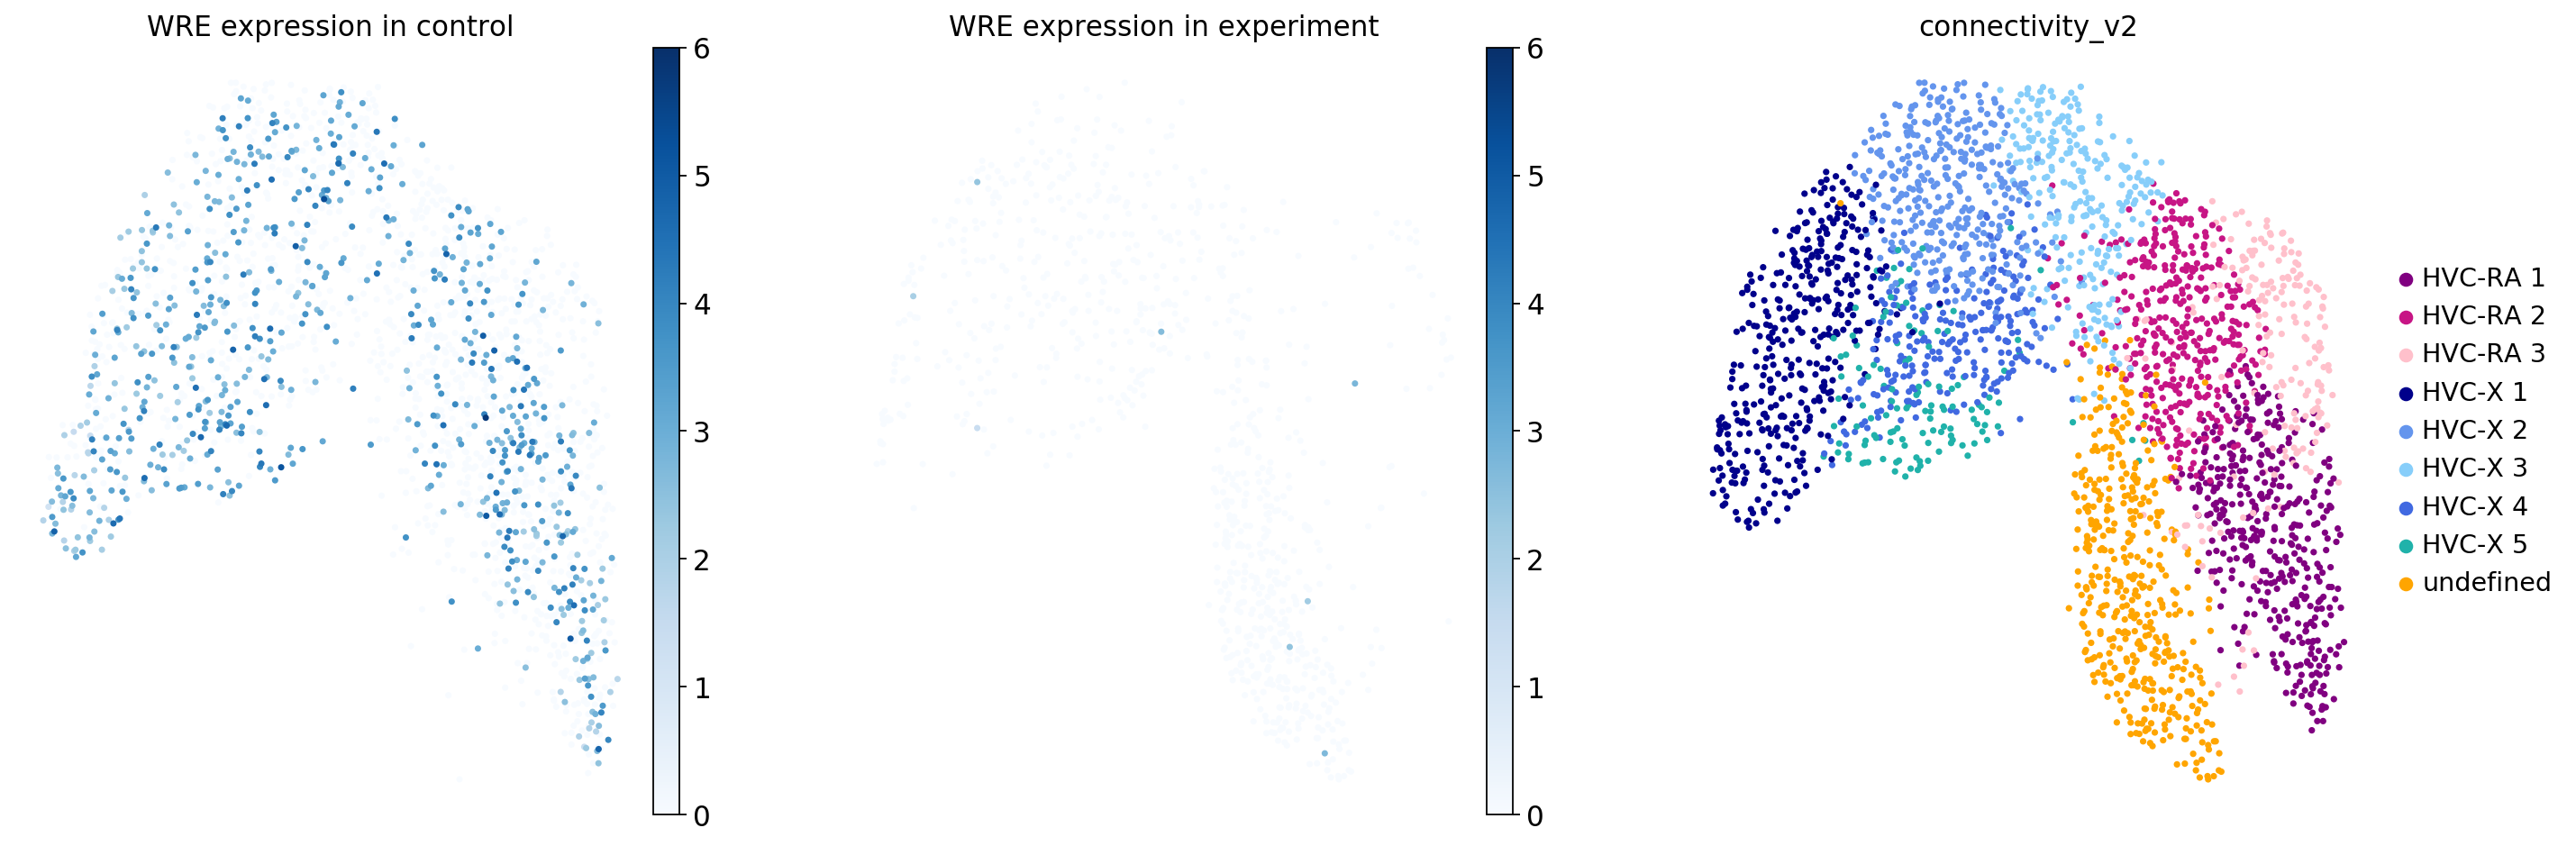

In [36]:
fig, axs = plt.subplots(figsize=(21,7), ncols=3)

gene = "WRE_WRE"
condition = ["control", "experiment"]
color_map = "Blues"
vmin = 0
vmax = 6
size = 40

sc.pl.umap(adata[np.char.startswith(nd(adata.obs.batch.values).astype(str), condition[0])], color=gene, title="{} expression in {}".format(gene.split("_")[0], condition[0]), size=size, color_map=color_map, vmin=vmin, vmax=vmax, use_raw=False, show=False, ax=axs[0])
sc.pl.umap(adata[np.char.startswith(nd(adata.obs.batch.values).astype(str), condition[1])], color=gene, title="{} expression in {}".format(gene.split("_")[0], condition[1]), size=size, color_map=color_map, vmin=vmin, vmax=vmax, use_raw=False, show=False, ax=axs[1])
sc.pl.umap(adata, color="connectivity_v2", show=False, ax=axs[2])

___

# Where are neurogenesis markers, and immediate early genes markers expressed?

In [37]:
neurogenesis = marker_gene_mat.loc[marker_gene_mat['mammalian neurogenesis'] != 0].index.values
activity = marker_gene_mat.loc[marker_gene_mat['immediate early genes'] != 0].index.values
# proliferation = marker_gene_mat.loc[marker_gene_mat['proliferation'] != 0].index.values

Plot neurogenesis markers in control and experiment datasets:

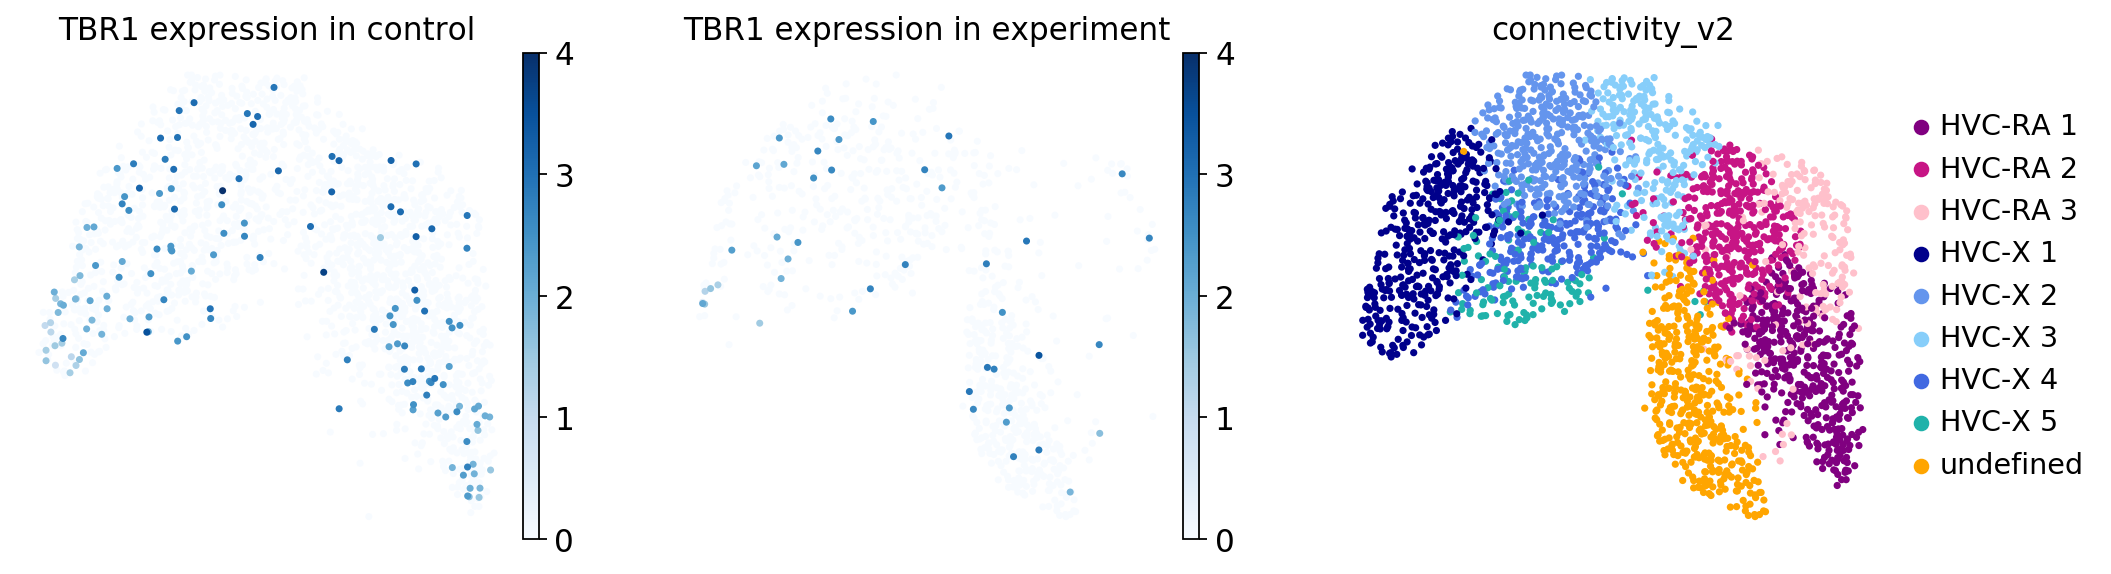

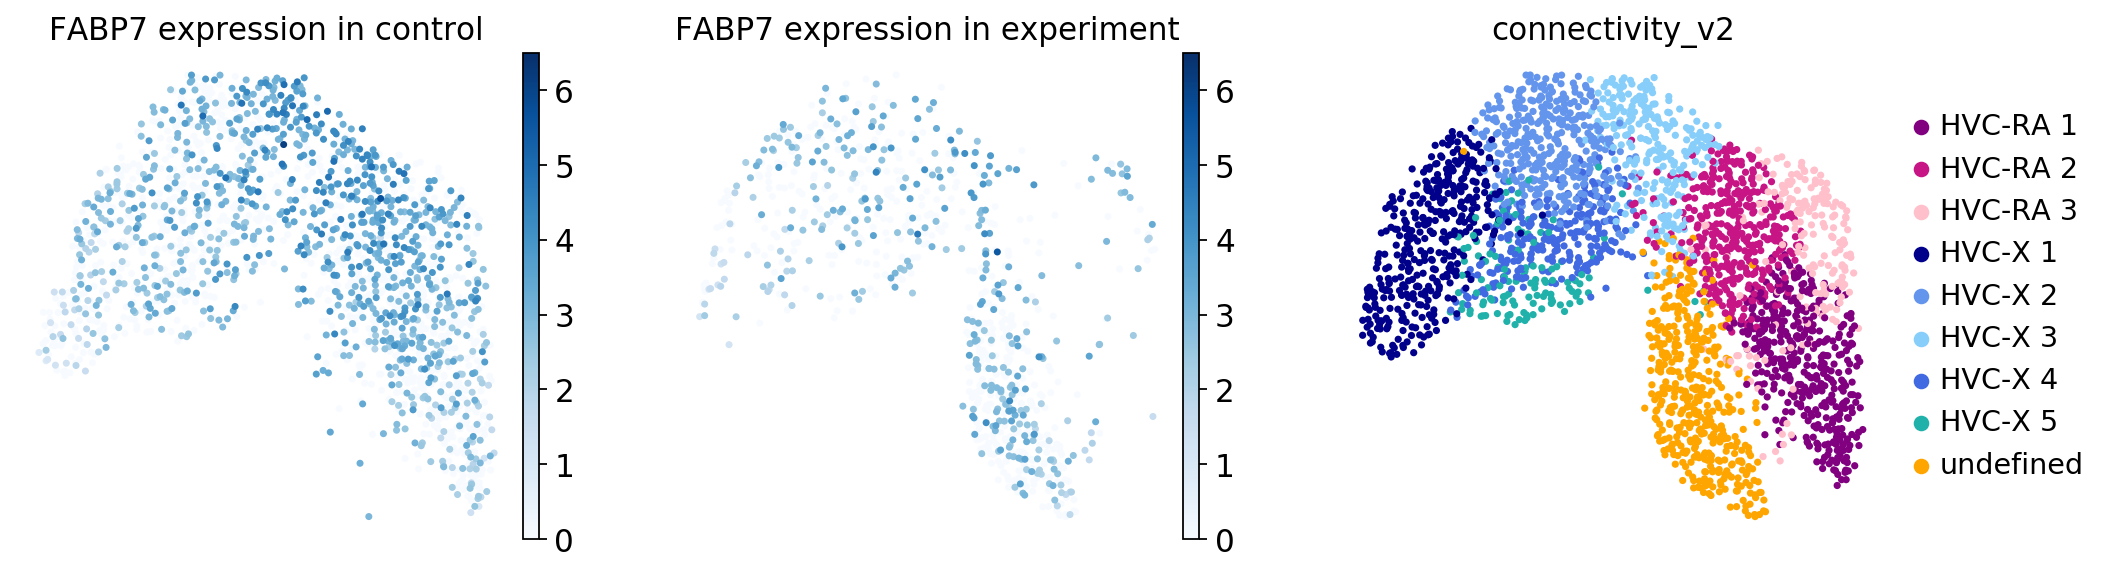

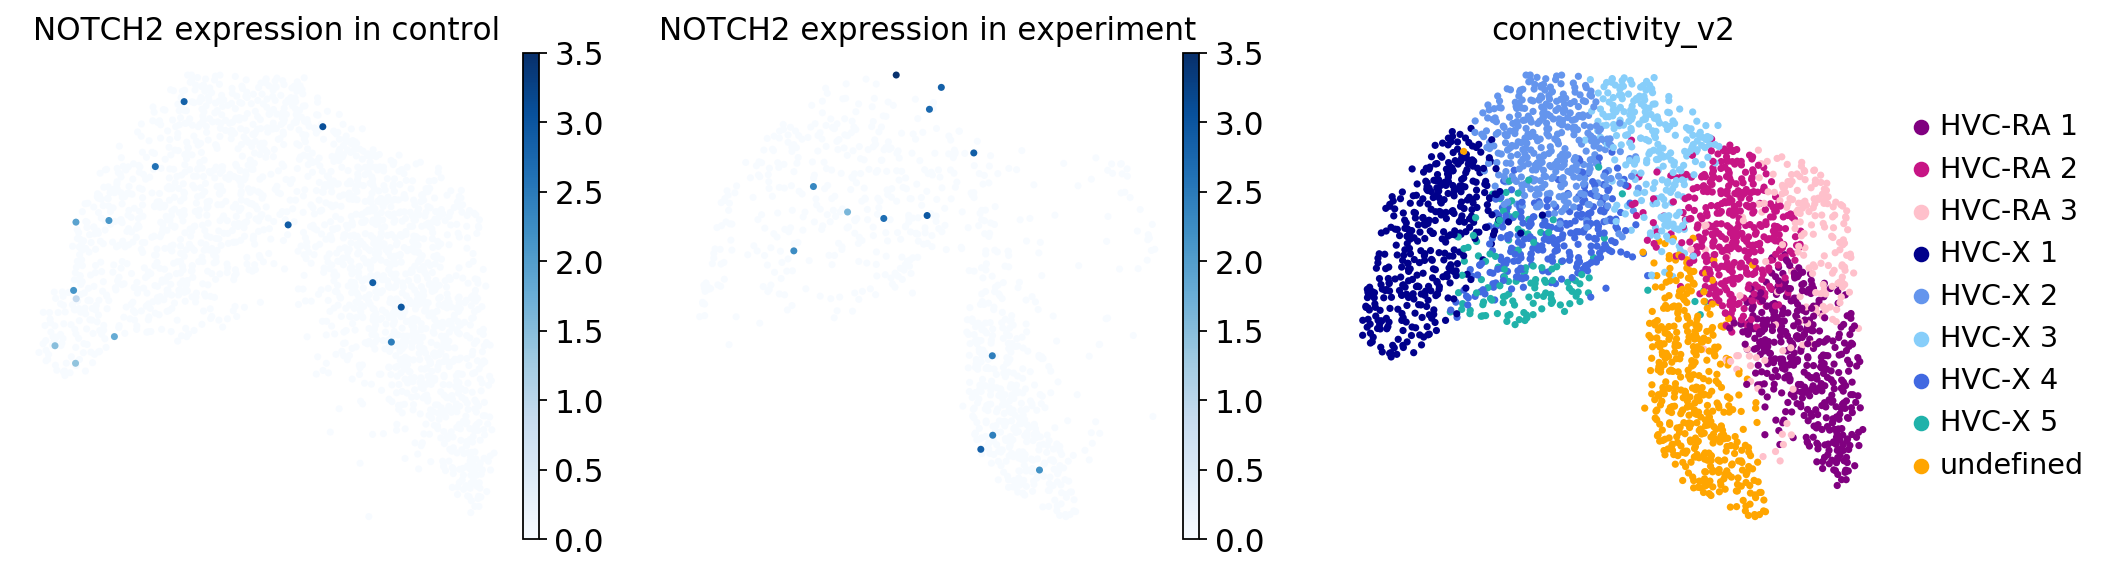

In [38]:
vmin = 0
vmax = [4, 6.5, 3.5]
size = 40

for i, gene in enumerate(neurogenesis):
    fig, axs = plt.subplots(figsize=(15,4), ncols=3)

    condition = ["control", "experiment"]
    color_map = "Blues"
    
    sc.pl.umap(adata[np.char.startswith(nd(adata.obs.batch.values).astype(str), condition[0])], color=gene, title="{} expression in {}".format(gene.split("_")[0], condition[0]), size=size, vmin=vmin, vmax=vmax[i], color_map=color_map, use_raw=False, show=False, ax=axs[0])
    sc.pl.umap(adata[np.char.startswith(nd(adata.obs.batch.values).astype(str), condition[1])], color=gene, title="{} expression in {}".format(gene.split("_")[0], condition[1]), size=size, vmin=vmin, vmax=vmax[i], color_map=color_map, use_raw=False, show=False, ax=axs[1])
    sc.pl.umap(adata, color="connectivity_v2", show=False, ax=axs[2])

Plot immediate early gene expression in control and experiment datasets:

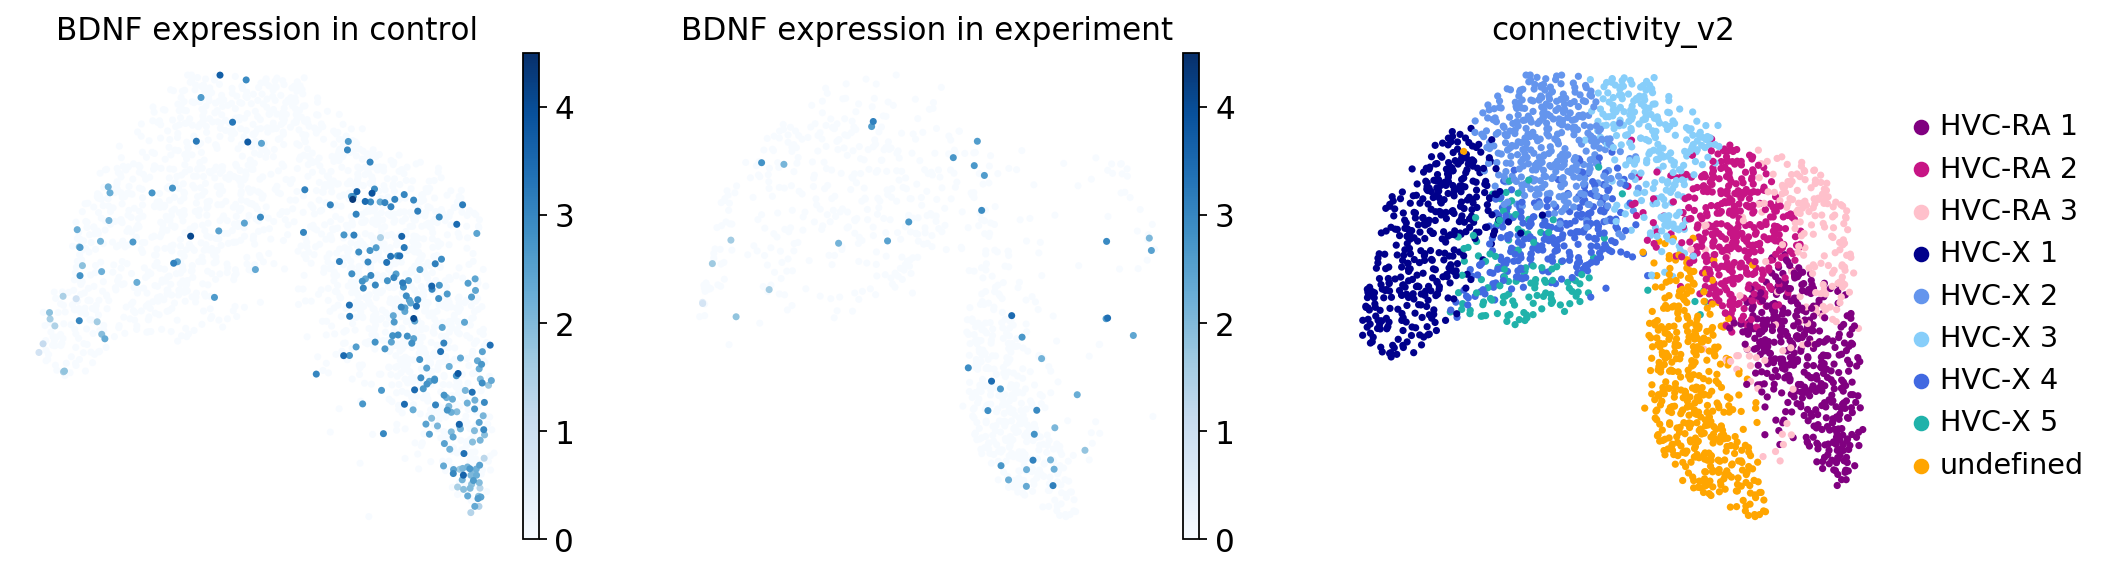

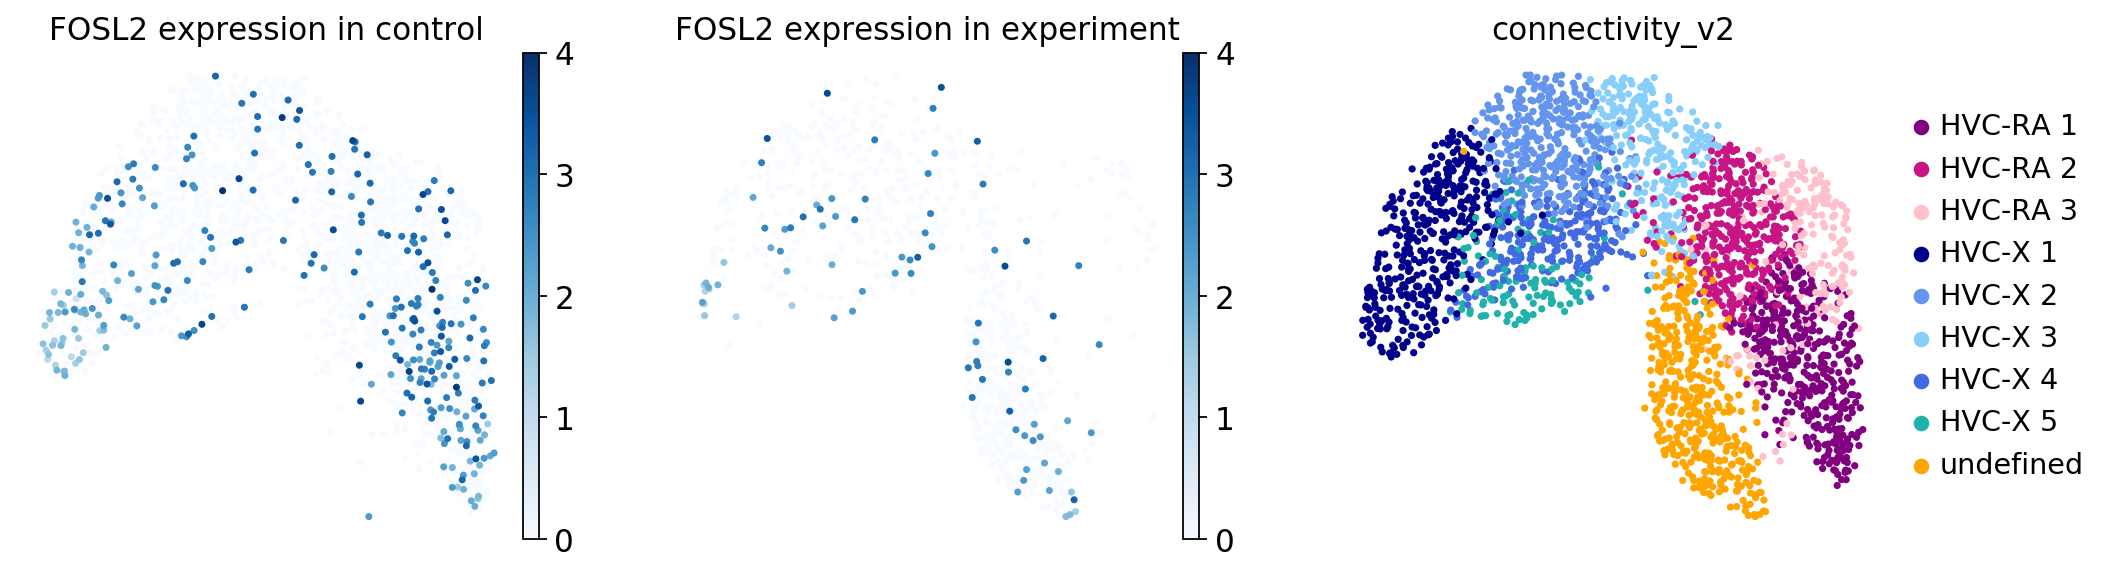

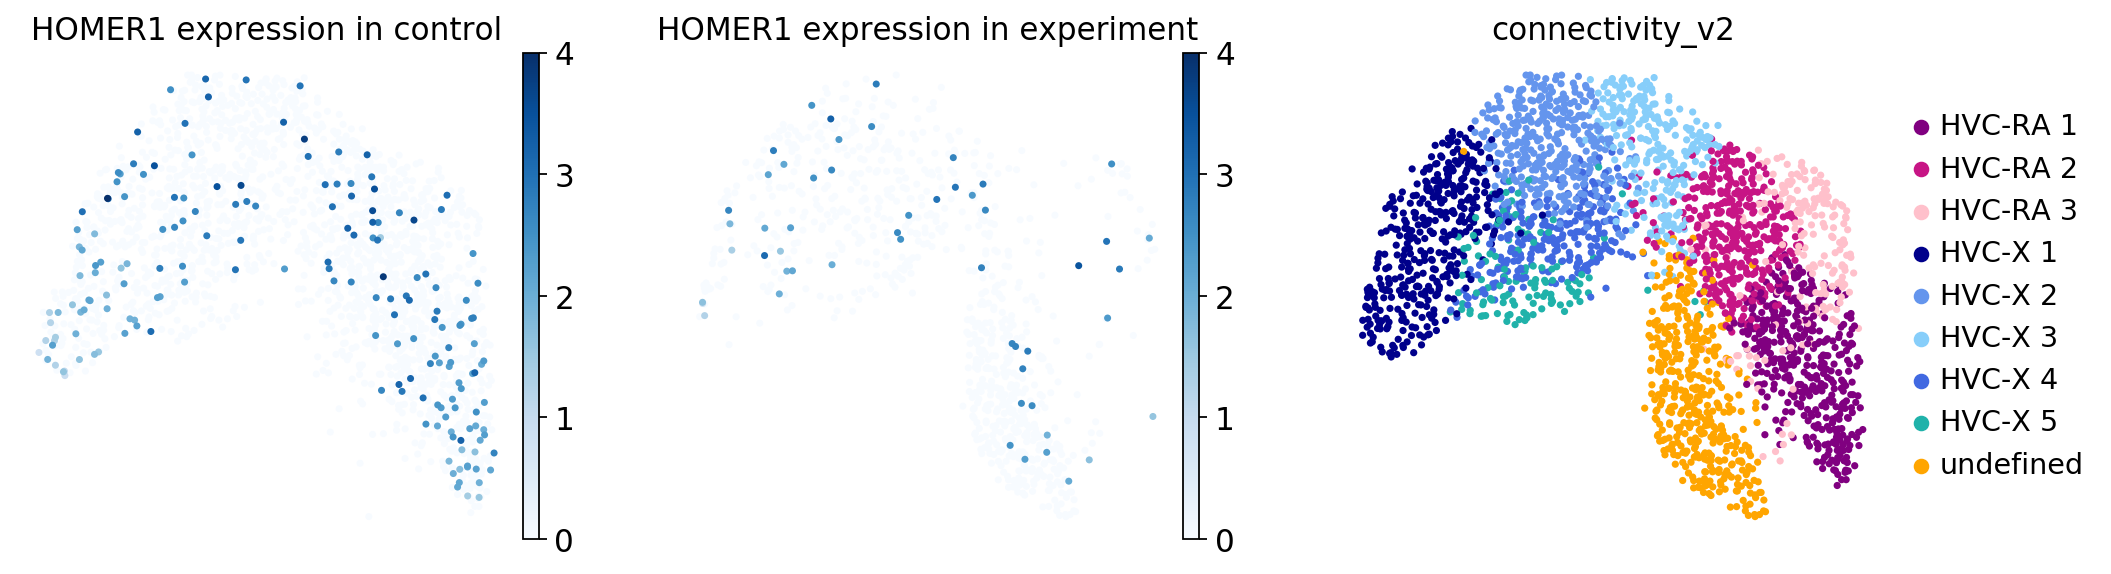

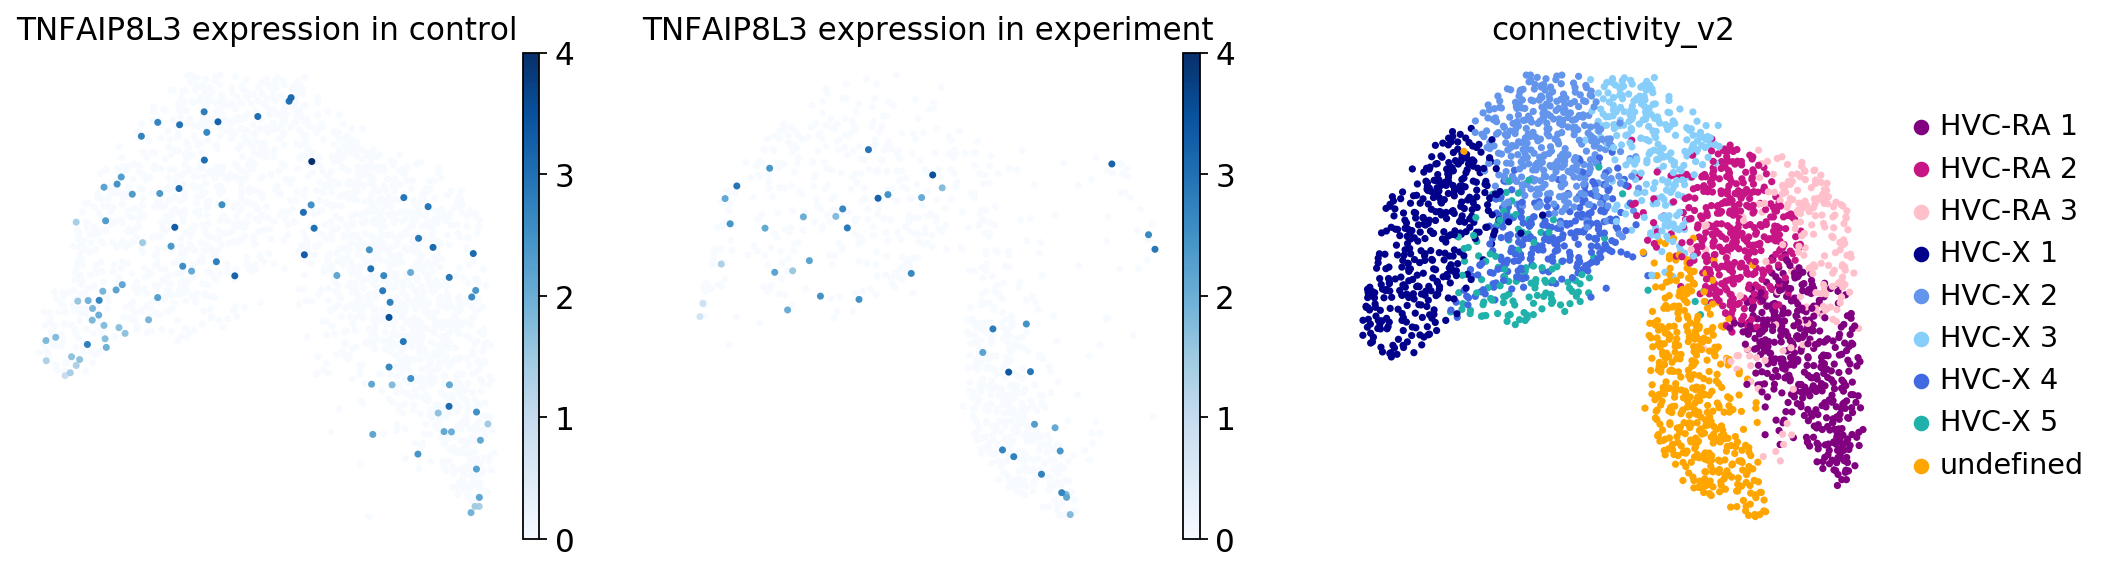

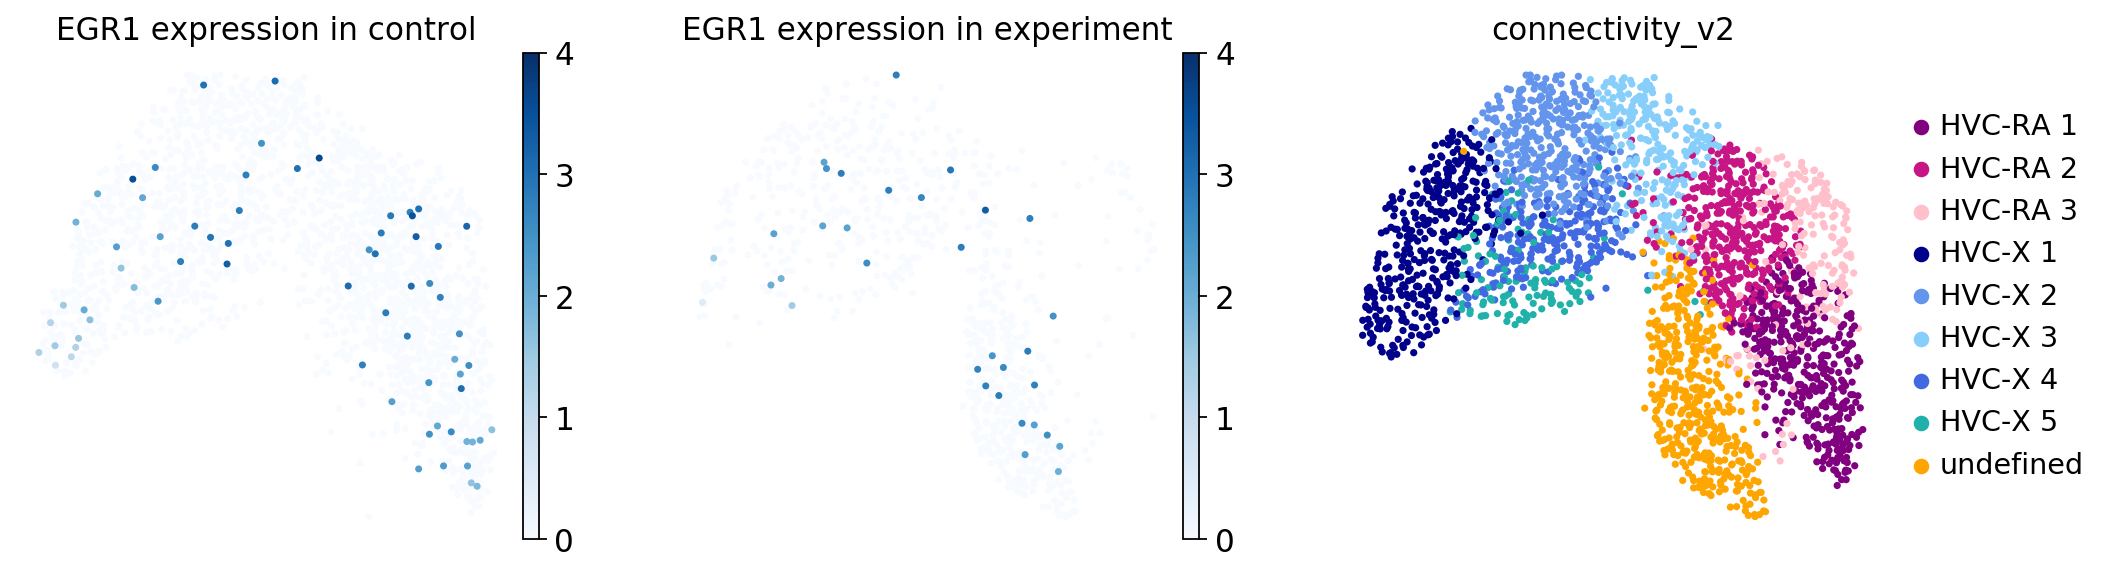

In [51]:
vmin = 0
vmax = [4.5, 4, 4, 4, 4]
size = 40

for i, gene in enumerate(activity):
    fig, axs = plt.subplots(figsize=(15,4), ncols=3)

    condition = ["control", "experiment"]
    color_map = "Blues"
    
    sc.pl.umap(adata[np.char.startswith(nd(adata.obs.batch.values).astype(str), condition[0])], color=gene, title="{} expression in {}".format(gene.split("_")[0], condition[0]), size=size, vmin=vmin, vmax=vmax[i], color_map=color_map, use_raw=False, show=False, ax=axs[0])
    sc.pl.umap(adata[np.char.startswith(nd(adata.obs.batch.values).astype(str), condition[1])], color=gene, title="{} expression in {}".format(gene.split("_")[0], condition[1]), size=size, vmin=vmin, vmax=vmax[i], color_map=color_map, use_raw=False, show=False, ax=axs[1])
    sc.pl.umap(adata, color="connectivity_v2", show=False, ax=axs[2])

Possibly, both neurogenesis and activity are going down in the glutamatergic neurons of experiment animals.

___

# Plot number of cells per cluster for control vs. experiment

In [40]:
# Normalize each celltype count to total number of cells in that batch by dividing
df_conn_norm = (adata.obs.groupby("connectivity_v2")["batch"].value_counts() / adata.obs.groupby("batch")["species"].count()).unstack().fillna(0)
df_conn_norm.columns = df_conn_norm.columns.astype(str)
df_conn_norm["total normalized count"] = df_conn_norm.sum(axis=1).values

df_conn_norm["control1_fraction"] = (df_conn_norm["control1"] / df_conn_norm["total normalized count"]).values
df_conn_norm["control2_fraction"] = (df_conn_norm["control2"] / df_conn_norm["total normalized count"]).values
df_conn_norm["experiment1_fraction"] = (df_conn_norm["experiment1"] / df_conn_norm["total normalized count"]).values
df_conn_norm["experiment2_fraction"] = (df_conn_norm["experiment2"] / df_conn_norm["total normalized count"]).values

df_conn_norm["total cellcount"] = adata.obs.groupby("connectivity_v2").size().values.astype(int)

df_conn_norm

batch            control1  control2  experiment1  experiment2  \
connectivity_v2                                                 
HVC-RA 1         0.158845  0.258640     0.008584     0.010667   
HVC-RA 2         0.243682  0.114827     0.017167     0.032000   
HVC-RA 3         0.085740  0.057971     0.070815     0.024000   
HVC-X 1          0.090253  0.186176     0.175966     0.133333   
HVC-X 2          0.141697  0.098105     0.173820     0.112000   
HVC-X 3          0.148917  0.047938     0.025751     0.104000   
HVC-X 4          0.070397  0.134894     0.045064     0.098667   
HVC-X 5          0.037004  0.049052     0.027897     0.080000   
undefined        0.023466  0.052397     0.454936     0.405333   

batch            total normalized count  control1_fraction  control2_fraction  \
connectivity_v2                                                                 
HVC-RA 1                       0.436735           0.363710           0.592212   
HVC-RA 2                       0.407677           0.597734           0.281662   
HVC-RA 3                       0.238527           0.359457           0.243038   
HVC-X 1                        0.585728           0.154086           0.317854   
HVC-X 2                        0.525621           0.269580           0.186645   
HVC-X 3                        0.326606           0.455953           0.146775   
HVC-X 4                        0.349022           0.201698           0.386491   
HVC-X 5                        0.193953           0.190786           0.252909   
undefined                      0.936132           0.025067           0.055972   

batch            experiment1_fraction  experiment2_fraction  total cellcount  
connectivity_v2                                                               
HVC-RA 1                     0.019654              0.024424              416  
HVC-RA 2                     0.042110              0.078494              393  
HVC-RA 3                     0.296887              0.100618              189  
HVC-X 1                      0.300422              0.227637              399  
HVC-X 2                      0.330694              0.213081              368  
HVC-X 3                      0.078845              0.318427              259  
HVC-X 4                      0.129116              0.282694              257  
HVC-X 5                      0.143834              0.412471              128  
undefined                    0.485974              0.432988              437

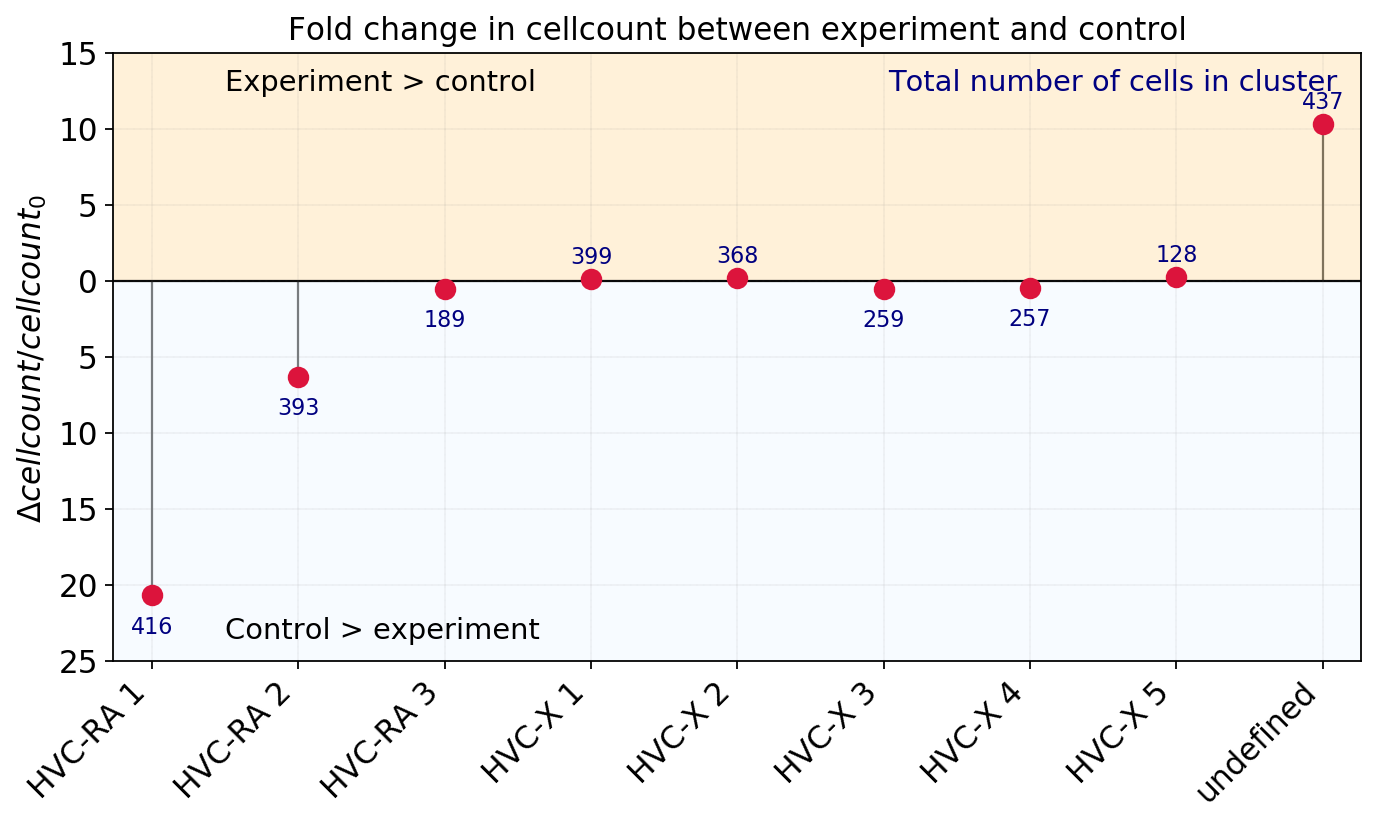

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))

exp = df_conn_norm[["experiment1", "experiment2"]].sum(axis=1)
ctrl = df_conn_norm[["control1", "control2"]].sum(axis=1)

x = df_conn_norm.index.values
y = []
cell_counts = df_conn_norm["total cellcount"].values
cell_color = "navy"

counter = 0

# Calculate fold change in both directions (exp > ctrl and ctrl > exp)
for i, exp_value in enumerate(exp):
    if exp_value > ctrl[i]:
        y_temp = (exp_value-ctrl[i]) / ctrl[i]
        y.append(y_temp)
        ax.text(x = counter, y = y_temp + 1, s = cell_counts[i], size = 10, ha='center', c=cell_color)
        counter +=1
    else:
        y_temp = np.negative((ctrl[i]-exp_value) / exp_value)
        y.append(y_temp)
        ax.text(x = counter, y = y_temp - 2.5, s = cell_counts[i], size = 10, ha='center', c=cell_color)
        counter +=1    

# Plot stem/scatter plot
ax.vlines(x, 0, y, color="black", linestyle="-", lw=1, zorder=-1)
ax.scatter(x , y, c="crimson", s=75)

ax.set(
    **{
        "title": "Fold change in cellcount between experiment and control",
        "ylabel": "$Δcellcount / cellcount_0$ ",
        "ylim": (-25, 15)
        #     "xlabel": "Celltypes"
    }
)

labels = ["25", "20", "15", "10", "5", "0", "5", "10", "15"]
ax.set_yticklabels(labels)

ax.axhline(y=0, color="black", linestyle="-", lw=1, zorder=-1)
ax.set_xticklabels(x, rotation=45, ha="right")

# Add blocks and text separating each comparison category
ax.axhspan(-25, 0, facecolor='aliceblue', alpha=0.5, zorder=-1)
ax.axhspan(0, 15, facecolor='moccasin', alpha=0.5, zorder=-1)
ax.text(0.5, -23.5, "Control > experiment", ha="left", size=13)
ax.text(0.5, 12.5, "Experiment > control", ha="left", size=13)
ax.text(8.1, 12.5, "Total number of cells in cluster", ha="right", c=cell_color, size=13)

ax.margins(x=0.025, y=0.025)
ax.grid(False)
ax.xaxis.grid(color='gray', ls='--', lw=0.1)
ax.yaxis.grid(color='gray', ls='--', lw=0.1)
ax.set_axisbelow(True)

fig.show()

___

# DE genes in all HVC-RA clusters between control and exp

Define masks to separate control and experiment datasets:

In [42]:
control_mask = np.logical_or(adata.obs["batch"]=="control1", adata.obs["batch"]=="control2")
experiment_mask = np.logical_or(adata.obs["batch"]=="experiment1", adata.obs["batch"]=="experiment2")

Add new obs column to separate between control and experiment in general, without separating between batches:

In [43]:
adata.obs["batch_g"] = ""

# This should be the right way to do this, but it does not work for some reason:
adata.obs.loc[control_mask, "batch_g"] = "control"
adata.obs.loc[experiment_mask, "batch_g"] = "experiment"

adata.obs["batch_g"] = adata.obs["batch_g"].astype("category")

adata.obs

species        batch  n_counts_processed batch_index  \
barcode                                                                       
AAACGAAGTACGCTTA-0  zebrafinch     control1         1687.000000           0   
AAACGAATCAACCGAT-0  zebrafinch     control1          452.000000           0   
AAAGGGCGTTGAGGAC-0  zebrafinch     control1          735.000000           0   
AAAGGGCTCTTCTGGC-0  zebrafinch     control1          450.000000           0   
AACAAAGTCAGCCTCT-0  zebrafinch     control1          496.000000           0   
...                        ...          ...                 ...         ...   
TTGTTGTGTGTATCCA-3  zebrafinch  experiment2          987.000000           3   
TTGTTGTTCCGGCTTT-3  zebrafinch  experiment2          754.000061           3   
TTTACCAGTGATGTAA-3  zebrafinch  experiment2          591.000000           3   
TTTGGAGCAAATGGAT-3  zebrafinch  experiment2          685.000000           3   
TTTGTTGTCAACGTGT-3  zebrafinch  experiment2          774.000000           3   

                    n_counts_raw leiden                 celltype  \
barcode                                                            
AAACGAAGTACGCTTA-0   1687.000000      1  glutamatergic neurons 2   
AAACGAATCAACCGAT-0    452.000000      5  glutamatergic neurons 2   
AAAGGGCGTTGAGGAC-0    735.000000      3  glutamatergic neurons 2   
AAAGGGCTCTTCTGGC-0    450.000000      5  glutamatergic neurons 2   
AACAAAGTCAGCCTCT-0    496.000000      3  glutamatergic neurons 2   
...                          ...    ...                      ...   
TTGTTGTGTGTATCCA-3    987.000000      0  glutamatergic neurons 2   
TTGTTGTTCCGGCTTT-3    754.000061      0  glutamatergic neurons 2   
TTTACCAGTGATGTAA-3    591.000000      0  glutamatergic neurons 2   
TTTGGAGCAAATGGAT-3    685.000000      0  glutamatergic neurons 2   
TTTGTTGTCAACGTGT-3    774.000000      0  glutamatergic neurons 2   

                      connectivity connectivity_v2     batch_g  
barcode                                                         
AAACGAAGTACGCTTA-0  HVC-X / HVC-RA        HVC-RA 1     control  
AAACGAATCAACCGAT-0  HVC-X / HVC-RA         HVC-X 3     control  
AAAGGGCGTTGAGGAC-0  HVC-X / HVC-RA        HVC-RA 2     control  
AAAGGGCTCTTCTGGC-0  HVC-X / HVC-RA         HVC-X 3     control  
AACAAAGTCAGCCTCT-0  HVC-X / HVC-RA        HVC-RA 2     control  
...                            ...             ...         ...  
TTGTTGTGTGTATCCA-3  HVC-X / HVC-RA       undefined  experiment  
TTGTTGTTCCGGCTTT-3  HVC-X / HVC-RA       undefined  experiment  
TTTACCAGTGATGTAA-3  HVC-X / HVC-RA       undefined  experiment  
TTTGGAGCAAATGGAT-3  HVC-X / HVC-RA       undefined  experiment  
TTTGTTGTCAACGTGT-3  HVC-X / HVC-RA       undefined  experiment  

[2846 rows x 10 columns]

In [44]:
adata_hvcra = adata[np.char.startswith(nd(adata.obs.connectivity_v2.values).astype(str), "HVC-RA")]
adata_hvcra

View of AnnData object with n_obs × n_vars = 998 × 22151
    obs: 'species', 'batch', 'n_counts_processed', 'batch_index', 'n_counts_raw', 'leiden', 'celltype', 'connectivity', 'connectivity_v2', 'batch_g'
    var: 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'celltype_colors', 'connectivity_colors', 'connectivity_v2_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [45]:
sc.tl.rank_genes_groups(adata_hvcra, groupby="batch_g", use_raw=False)

Trying to set attribute `.uns` of view, copying.


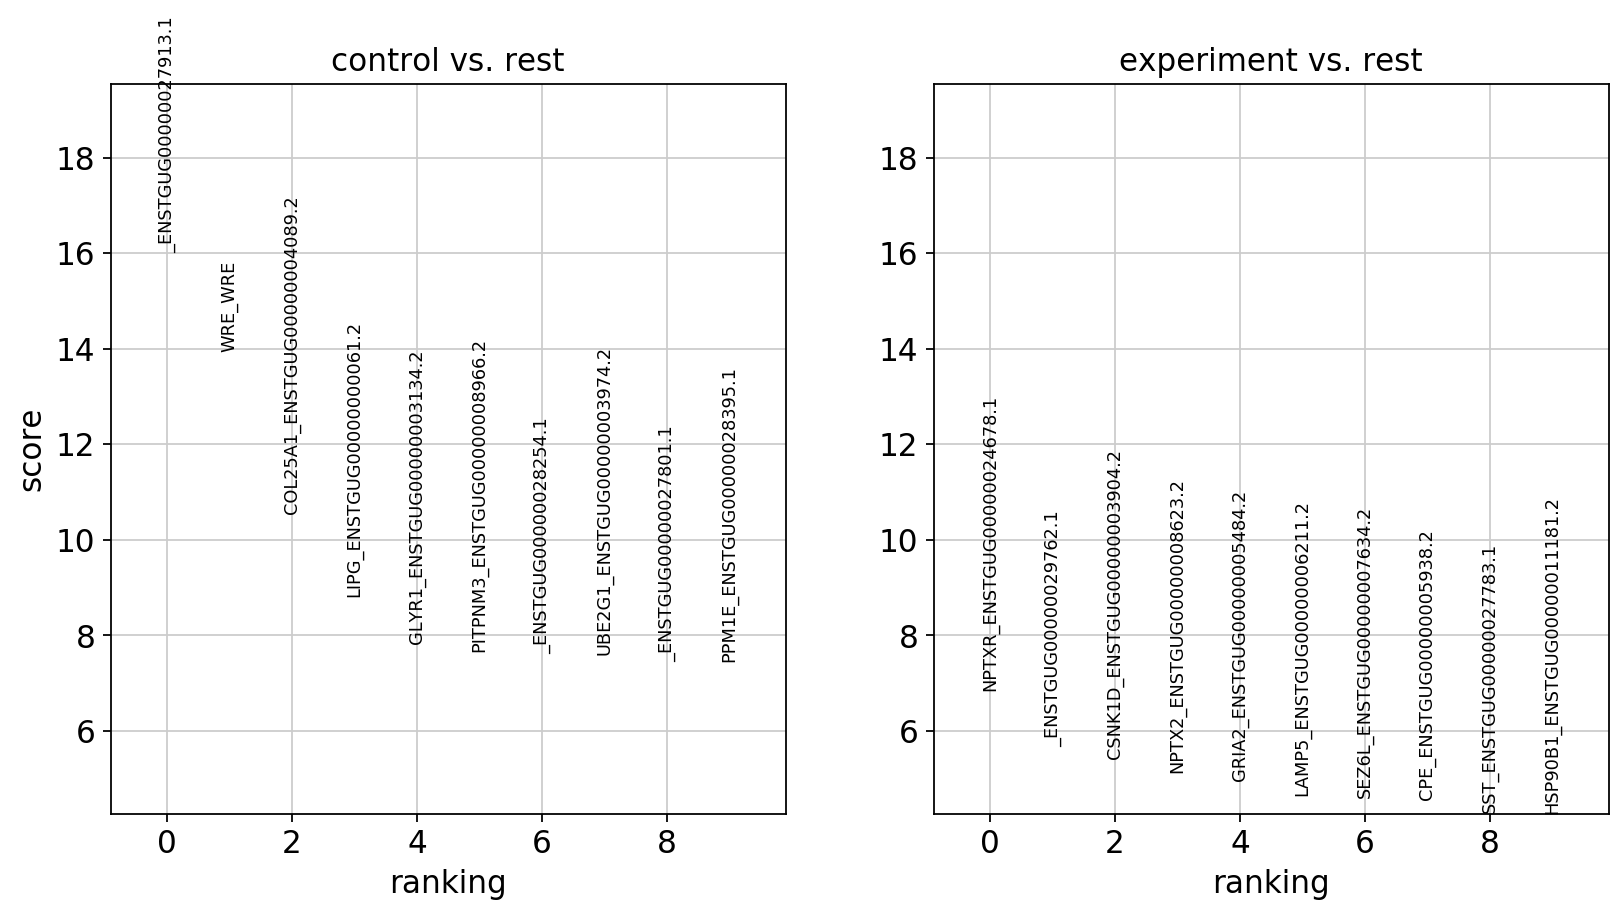

In [46]:
sc.pl.rank_genes_groups(adata_hvcra, n_genes=10, sharey=True, save=False, ncols=2)

In [52]:
hvcra_markers = pd.DataFrame(adata_hvcra.uns['rank_genes_groups']['names']).head(10)

control                    experiment
0         _ENSTGUG00000027913.1    NPTXR_ENSTGUG00000024678.1
1                       WRE_WRE         _ENSTGUG00000029762.1
2  COL25A1_ENSTGUG00000004089.2   CSNK1D_ENSTGUG00000003904.2
3     LIPG_ENSTGUG00000000061.2    NPTX2_ENSTGUG00000008623.2
4    GLYR1_ENSTGUG00000003134.2    GRIA2_ENSTGUG00000005484.2
5  PITPNM3_ENSTGUG00000008966.2    LAMP5_ENSTGUG00000006211.2
6         _ENSTGUG00000028254.1    SEZ6L_ENSTGUG00000007634.2
7   UBE2G1_ENSTGUG00000003974.2      CPE_ENSTGUG00000005938.2
8         _ENSTGUG00000027801.1      SST_ENSTGUG00000027783.1
9    PPM1E_ENSTGUG00000028395.1  HSP90B1_ENSTGUG00000011181.2

In [60]:
hvcra_markers["exp_gene"] = [
    "Neuronal Pentraxin Receptor",
    "histone deacetylase 7-like (HDAC7)",
    "Casein Kinase 1 Delta",
    "Neuronal Pentraxin 2",
    "Glutamate Ionotropic Receptor AMPA Type Subunit 2",
    "Lysosomal Associated Membrane Protein Family Member 5",
    "Seizure Related 6 Homolog Like",
    "Carboxypeptidase E",
    "Somatostatin",
    "Heat Shock Protein 90 Beta Family Member 1"
]

hvcra_markers["exp_gene_function"] = [
    "May be involved in mediating uptake of synaptic material during synapse remodeling or in mediating the synaptic clustering of AMPA glutamate receptors at a subset of excitatory synapses.",
    "Responsible for the deacetylation of lysine residues on the N-terminal part of the core histones (H2A, H2B, H3 and H4). Histone deacetylation gives a tag for epigenetic repression and plays an important role in transcriptional regulation, cell cycle progression and developmental events. Histone deacetylases act via the formation of large multiprotein complexes.",
    "Essential serine/threonine-protein kinase that regulates diverse cellular growth and survival processes including Wnt signaling, DNA repair and circadian rhythms. It can phosphorylate a large number of proteins.",
    "This protein is involved in excitatory synapse formation. It also plays a role in clustering of alpha-amino-3-hydroxy-5-methyl-4-isoxazolepropionic acid (AMPA)-type glutamate receptors at established synapses, resulting in non-apoptotic cell death of dopaminergic nerve cells. Likely to play role in the modification of cellular properties that underlie long-term plasticity.",
    "Receptor for glutamate that functions as ligand-gated ion channel in the central nervous system (PubMed:31300657). It plays an important role in excitatory synaptic transmission.",
    "Plays a role in short-term synaptic plasticity in a subset of GABAergic neurons in the brain",
    "May contribute to specialized endoplasmic reticulum functions in neurons. SE6L1_HUMAN,Q9BYH1",
    "This gene encodes a member of the M14 family of metallocarboxypeptidases. This peripheral membrane protein cleaves C-terminal amino acid residues and is involved in the biosynthesis of peptide hormones and neurotransmitters, including insulin. This protein may also function independently of its peptidase activity, as a neurotrophic factor that promotes neuronal survival, and as a sorting receptor that binds to regulated secretory pathway proteins, including prohormones. Acts also as a prohormone processing enzyme in neuro/endocrine cells, removing dibasic residues from the C-terminal end of peptide hormone precursors after initial endoprotease cleavage.",
    "Somatostatin is expressed throughout the body and inhibits the release of numerous secondary hormones by binding to high-affinity G-protein-coupled somatostatin receptors. Inhibits the secretion of pituitary hormones, including that of growth hormone/somatotropin (GH1), PRL, ACTH, luteinizing hormone (LH) and TSH. ",
    "This gene encodes a member of a family of adenosine triphosphate(ATP)-metabolizing molecular chaperones with roles in stabilizing and folding other proteins. Molecular chaperone that functions in the processing and transport of secreted proteins (By similarity).",
]

hvcra_markers["control_gene"] = [
    "novel gene",
    "WRE",
    "Collagen Type XXV Alpha 1 Chain",
    "Endothelial Cell-Derived Lipase",
    "Glyoxylate Reductase 1 Homolog",
    "", "", "", "", "",
]

hvcra_markers["control_gene_function"] = [
    "novel gene",
    "WRE",
    "This gene encodes a brain-specific membrane associated collagen. A product of proteolytic processing of the encoded protein, CLAC (collagenous Alzheimer amyloid plaque component), binds to amyloid beta-peptides found in Alzheimer amyloid plaques but CLAC inhibits rather than facilitates amyloid fibril elongation (PMID: 16300410). A study of over-expression of this collagen in mice, however, found changes in pathology and behavior suggesting that the encoded protein may promote amyloid plaque formation (PMID: 19548013).",
    "The protein encoded by this gene has substantial phospholipase activity and may be involved in lipoprotein metabolism and vascular biology. This protein is designated a member of the TG lipase family by its sequence and characteristic lid region which provides substrate specificity for enzymes of the TG lipase family.",
    "Nucleosome-destabilizing factor that is recruited to genes during transcriptional activation (PubMed:29759984)",
    "", "", "", "", "",
]
pd.set_option('display.max_colwidth', None)
hvcra_markers

control                    experiment  \
0         _ENSTGUG00000027913.1    NPTXR_ENSTGUG00000024678.1   
1                       WRE_WRE         _ENSTGUG00000029762.1   
2  COL25A1_ENSTGUG00000004089.2   CSNK1D_ENSTGUG00000003904.2   
3     LIPG_ENSTGUG00000000061.2    NPTX2_ENSTGUG00000008623.2   
4    GLYR1_ENSTGUG00000003134.2    GRIA2_ENSTGUG00000005484.2   
5  PITPNM3_ENSTGUG00000008966.2    LAMP5_ENSTGUG00000006211.2   
6         _ENSTGUG00000028254.1    SEZ6L_ENSTGUG00000007634.2   
7   UBE2G1_ENSTGUG00000003974.2      CPE_ENSTGUG00000005938.2   
8         _ENSTGUG00000027801.1      SST_ENSTGUG00000027783.1   
9    PPM1E_ENSTGUG00000028395.1  HSP90B1_ENSTGUG00000011181.2   

                      control_gene  \
0                       novel gene   
1                              WRE   
2  Collagen Type XXV Alpha 1 Chain   
3  Endothelial Cell-Derived Lipase   
4   Glyoxylate Reductase 1 Homolog   
5                                    
6                                    
7                                    
8                                    
9                                    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          control_gene_function  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    novel gene   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           WRE   
2  This gene encodes a brain-specific membrane associated collagen. A product of proteolytic processing of the encoded protein, CLAC (collagenous Alzheimer amyloid plaque component), binds to amyloid beta-peptides found in Alzheimer amyloid plaques but CLAC inhibits rather than facilitates amyloid fibril elongation (PMID: 16300410). A study of over-expression of this collagen in mice, however, found changes in pathology and behavior suggesting that the encoded protein may promote amyloid plaque formation (PMID: 19548013).   
3                                                                                                                                                                                                               The protein encoded by this gene has substantial phospholipase activity and may be involved in lipoprotein metabolism and vascular biology. This protein is designated a member of the TG lipase family by its sequence and characteristic lid region which provides substrate specificity for enzymes of the TG lipase family.   
4                                                                                                                                                                                                                                         

___

# DE genes in all HVC-X clusters between control and exp

In [61]:
adata_hvcx = adata[np.char.startswith(nd(adata.obs.connectivity_v2.values).astype(str), "HVC-X")]
adata_hvcx

View of AnnData object with n_obs × n_vars = 1411 × 22151
    obs: 'species', 'batch', 'n_counts_processed', 'batch_index', 'n_counts_raw', 'leiden', 'celltype', 'connectivity', 'connectivity_v2', 'batch_g'
    var: 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'celltype_colors', 'connectivity_colors', 'connectivity_v2_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [62]:
sc.tl.rank_genes_groups(adata_hvcx, groupby="batch_g", use_raw=False)

Trying to set attribute `.uns` of view, copying.


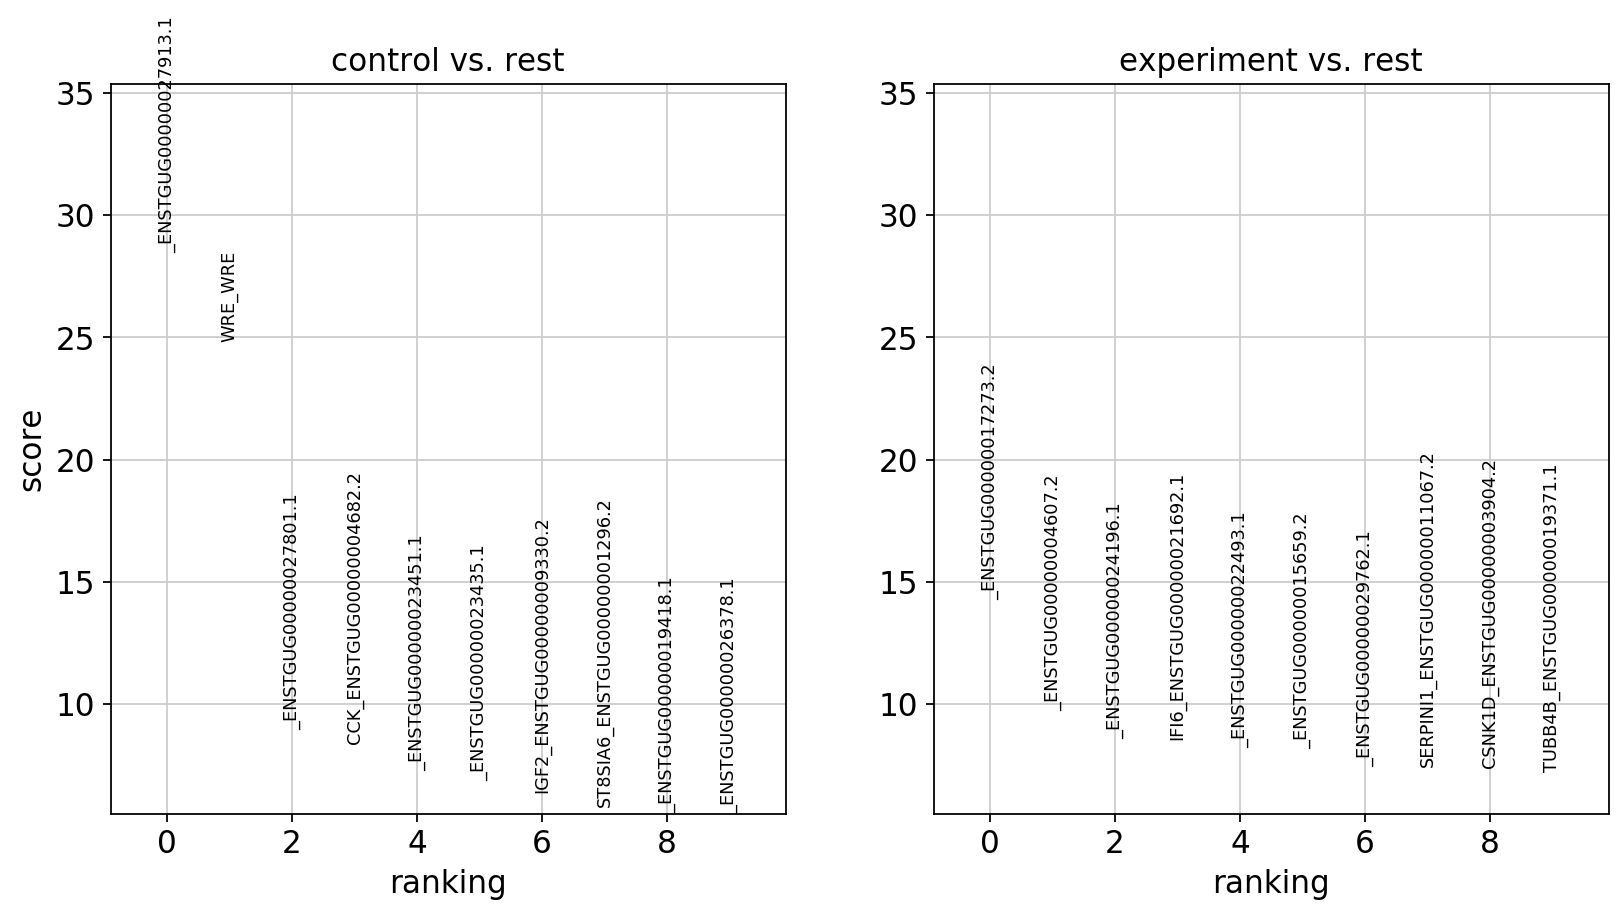

In [63]:
sc.pl.rank_genes_groups(adata_hvcx, n_genes=10, sharey=True, save=False, ncols=2)

In [67]:
hvcx_markers = pd.DataFrame(adata_hvcx.uns['rank_genes_groups']['names']).head(10)
hvcx_markers

control                     experiment
0         _ENSTGUG00000027913.1          _ENSTGUG00000017273.2
1                       WRE_WRE          _ENSTGUG00000004607.2
2         _ENSTGUG00000027801.1          _ENSTGUG00000024196.1
3      CCK_ENSTGUG00000004682.2      IFI6_ENSTGUG00000021692.1
4         _ENSTGUG00000023451.1          _ENSTGUG00000022493.1
5         _ENSTGUG00000023435.1          _ENSTGUG00000015659.2
6     IGF2_ENSTGUG00000009330.2          _ENSTGUG00000029762.1
7  ST8SIA6_ENSTGUG00000001296.2  SERPINI1_ENSTGUG00000011067.2
8         _ENSTGUG00000019418.1    CSNK1D_ENSTGUG00000003904.2
9         _ENSTGUG00000026378.1    TUBB4B_ENSTGUG00000019371.1

In [71]:
hvcx_markers["exp_gene"] = [
    "class I histocompatibility antigen, F10 alpha chain-like (MHC Class I Antigen)",
    "novel gene",
    "novel gene",
    "Interferon Alpha Inducible Protein 6",
    "novel gene",
    "Ferritin, higher subunit",
    "Histone deacetylase 7-like (HDAC7)",
    "Serpin Family I Member 1",
    "Casein Kinase 1 Delta",
    "Tubulin Beta 4B Class IVb"
]

hvcx_markers["exp_gene_function"] = [
    "Antigen-presenting major histocompatibility complex class I (MHCI) molecule. In complex with B2M/beta 2 microglobulin displays primarily viral and tumor-derived peptides on antigen-presenting cells for recognition by alpha-beta T cell receptor (TCR) on HLA-A-restricted CD8-positive T cells, guiding antigen-specific T cell immune response to eliminate infected or transformed cells (PubMed:2456340, PubMed:2784196, PubMed:1402688, PubMed:7504010, PubMed:9862734, PubMed:10449296, PubMed:12138174, PubMed:12393434, PubMed:15893615, PubMed:17189421, PubMed:19543285, PubMed:21498667, PubMed:24192765, PubMed:7694806, PubMed:24395804, PubMed:28250417). May also present self-peptides derived from the signal sequence of secreted or membrane proteins, although T cells specific for these peptides are usually inactivated to prevent autoreactivity (PubMed:25880248, PubMed:7506728, PubMed:7679507). Both the peptide and the MHC molecule are recognized by TCR, the peptide is responsible for the fine specificity of antigen recognition and MHC residues account for the MHC restriction of T cells (PubMed:12796775, PubMed:18275829, PubMed:19542454, PubMed:28250417). Typically presents intracellular peptide antigens of 8 to 13 amino acids that arise from cytosolic proteolysis via IFNG-induced immunoproteasome or via endopeptidase IDE/insulin-degrading enzyme (PubMed:17189421, PubMed:20364150, PubMed:17079320, PubMed:26929325, PubMed:27049119). Can bind different peptides containing allele-specific binding motifs, which are mainly defined by anchor residues at position 2 and 9 (PubMed:7504010, PubMed:9862734).",
    "novel gene",
    "novel gene",
    "Plays a role in apoptosis, negatively regulating the intrinsinc apoptotic signaling pathway and TNFSF10-induced apoptosis (PubMed:15685448, PubMed:17823654, PubMed:26244642). However, it has also been shown to have a pro-apoptotic activity (PubMed:27673746). Has an antiviral activity towards hepatitis C virus/HCV by inhibiting the EGFR signaling pathway, which activation is required for entry of the virus into cells (PubMed:25757571).",
    "novel gene",
    "Stores iron in a soluble, non-toxic, readily available form. Important for iron homeostasis. Iron is taken up in the ferrous form and deposited as ferric hydroxides after oxidation. Also plays a role in delivery of iron to cells.",
    "Responsible for the deacetylation of lysine residues on the N-terminal part of the core histones (H2A, H2B, H3 and H4). Histone deacetylation gives a tag for epigenetic repression and plays an important role in transcriptional regulation, cell cycle progression and developmental events. Histone deacetylases act via the formation of large multiprotein complexes.",
    "Serine protease inhibitor that inhibits plasminogen activators and plasmin but not thrombin (PubMed:9442076, PubMed:26329378, PubMed:19265707, PubMed:19285087, PubMed:11880376). May be involved in the formation or reorganization of synaptic connections as well as for synaptic plasticity in the adult nervous system. May protect neurons from cell damage by tissue-type plasminogen activator (Probable). NEUS_HUMAN,Q99574",
    "Essential serine/threonine-protein kinase that regulates diverse cellular growth and survival processes including Wnt signaling, DNA repair and circadian rhythms. It can phosphorylate a large number of proteins.",
    "Tubulin is the major constituent of microtubules. Among its related pathways are Cooperation of Prefoldin and TriC/CCT in actin and tubulin folding and Cytoskeleton remodeling Neurofilaments."
]

pd.set_option('display.max_colwidth', None)
hvcx_markers

control                     experiment  \
0         _ENSTGUG00000027913.1          _ENSTGUG00000017273.2   
1                       WRE_WRE          _ENSTGUG00000004607.2   
2         _ENSTGUG00000027801.1          _ENSTGUG00000024196.1   
3      CCK_ENSTGUG00000004682.2      IFI6_ENSTGUG00000021692.1   
4         _ENSTGUG00000023451.1          _ENSTGUG00000022493.1   
5         _ENSTGUG00000023435.1          _ENSTGUG00000015659.2   
6     IGF2_ENSTGUG00000009330.2          _ENSTGUG00000029762.1   
7  ST8SIA6_ENSTGUG00000001296.2  SERPINI1_ENSTGUG00000011067.2   
8         _ENSTGUG00000019418.1    CSNK1D_ENSTGUG00000003904.2   
9         _ENSTGUG00000026378.1    TUBB4B_ENSTGUG00000019371.1   

                                                                         exp_gene  \
0  class I histocompatibility antigen, F10 alpha chain-like (MHC Class I Antigen)   
1                                                                      novel gene   
2                                                                      novel gene   
3                                            Interferon Alpha Inducible Protein 6   
4                                                                      novel gene   
5                                                        Ferritin, higher subunit   
6                                              Histone deacetylase 7-like (HDAC7)   
7                                                        Serpin Family I Member 1   
8                                                           Casein Kinase 1 Delta   
9                                                       Tubulin Beta 4B Class IVb   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             exp_gene_function  
0  Antigen-presenting major histocompatibility complex class I (MHCI) molecule. In complex with B2M/beta 2 microglobulin displays primarily viral and tumor-derived peptides on antigen-presenting cells for recognition by alpha-beta T cell receptor (TCR) on HLA-A-restricted CD8-positive T cells, guiding antigen-specific T cell immune response to eliminate infected or transformed cells (PubMed:2456340, PubMed:2784196, PubMed:1402688, PubMed:7504010, PubMed:9862734, PubMed:10449296, PubMed:12138174, PubMed:12393434, PubMed:15893615, PubMed:17189421, PubMed:19543285, PubMed:21498667, PubMed:24192765, PubMed:7694806, PubMed:24395804, PubMed:28250417). May also present self-peptides derived from the signal sequence of secreted or membrane pr

____

# DE genes in the undefined cluster between control and exp

In [72]:
adata_undef = adata[np.char.startswith(nd(adata.obs.connectivity_v2.values).astype(str), "undefined")]
adata_undef

View of AnnData object with n_obs × n_vars = 437 × 22151
    obs: 'species', 'batch', 'n_counts_processed', 'batch_index', 'n_counts_raw', 'leiden', 'celltype', 'connectivity', 'connectivity_v2', 'batch_g'
    var: 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'celltype_colors', 'connectivity_colors', 'connectivity_v2_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [73]:
sc.tl.rank_genes_groups(adata_undef, groupby="batch_g", use_raw=False)

Trying to set attribute `.uns` of view, copying.


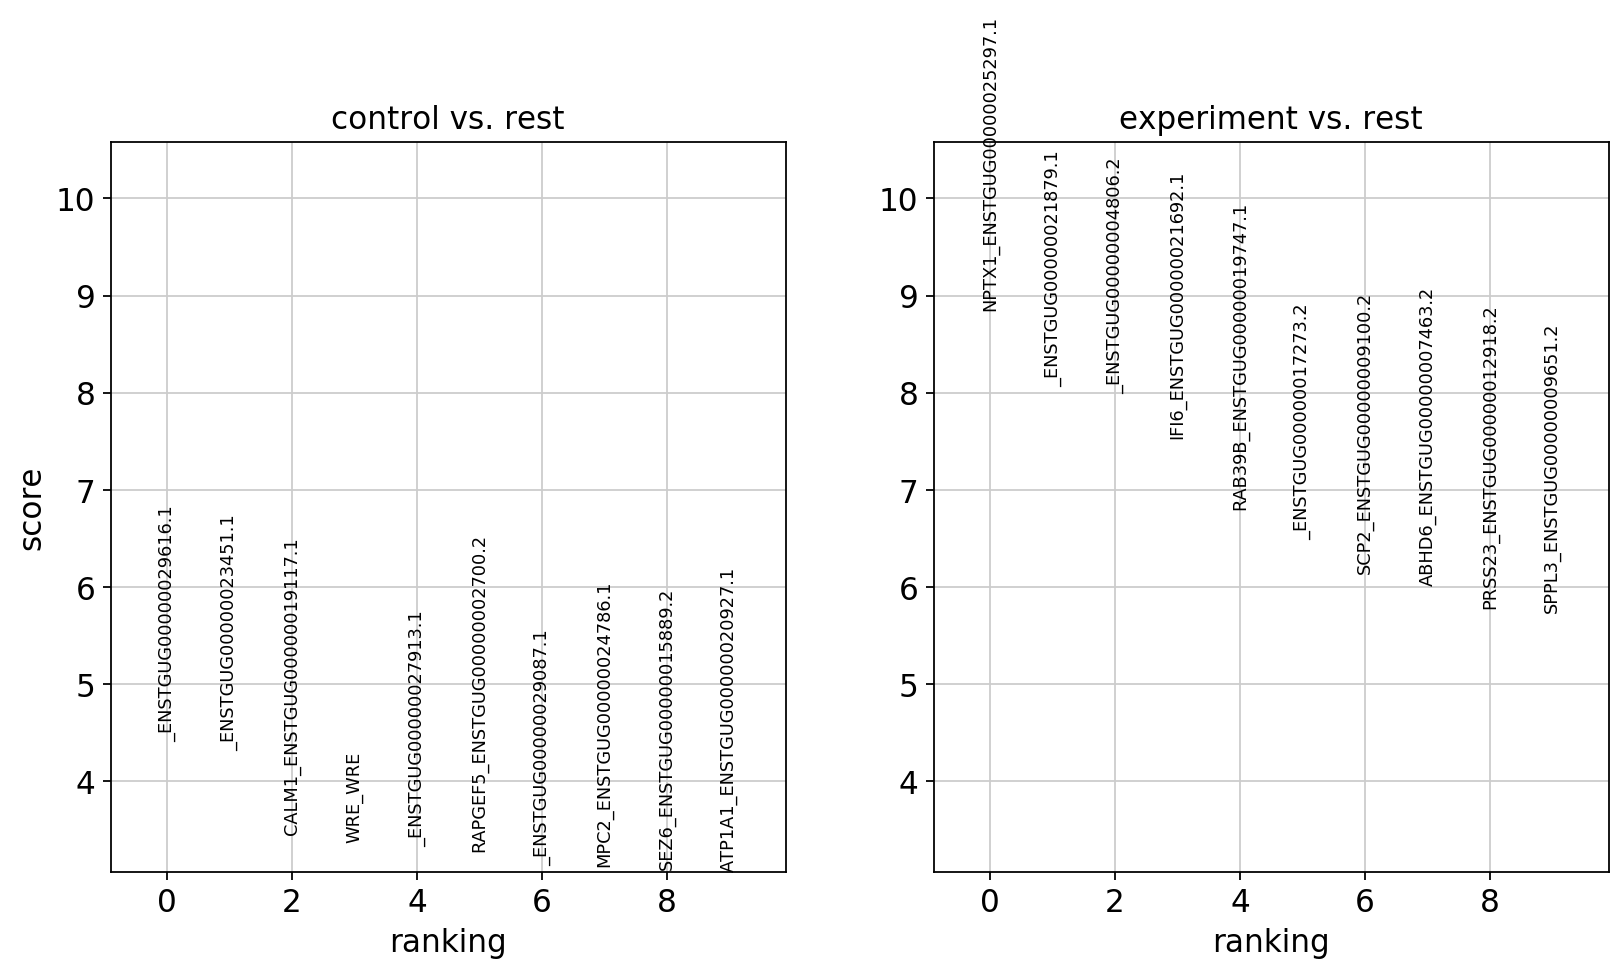

In [74]:
sc.pl.rank_genes_groups(adata_undef, n_genes=10, sharey=True, save=False, ncols=2)

In [75]:
undef_markers = pd.DataFrame(adata_undef.uns['rank_genes_groups']['names']).head(10)
undef_markers

control                   experiment
0         _ENSTGUG00000029616.1   NPTX1_ENSTGUG00000025297.1
1         _ENSTGUG00000023451.1        _ENSTGUG00000021879.1
2    CALM1_ENSTGUG00000019117.1        _ENSTGUG00000004806.2
3                       WRE_WRE    IFI6_ENSTGUG00000021692.1
4         _ENSTGUG00000027913.1  RAB39B_ENSTGUG00000019747.1
5  RAPGEF5_ENSTGUG00000002700.2        _ENSTGUG00000017273.2
6         _ENSTGUG00000029087.1    SCP2_ENSTGUG00000009100.2
7     MPC2_ENSTGUG00000024786.1   ABHD6_ENSTGUG00000007463.2
8     SEZ6_ENSTGUG00000015889.2  PRSS23_ENSTGUG00000012918.2
9   ATP1A1_ENSTGUG00000020927.1   SPPL3_ENSTGUG00000009651.2

In [76]:
undef_markers["exp_gene"] = [
    "Neuronal Pentraxin 1",
    "Extracellular fatty acid-binding protein-like",
    "Pancreatic alpha-amylase-like",
    "Interferon Alpha Inducible Protein 6",
    "Member RAS Oncogene Family",
    "Class I histocompatibility antigen, F10 alpha chain-like",
    "Sterol Carrier Protein 2",
    "Abhydrolase Domain Containing 6, Acylglycerol Lipase",
    "Serine Protease 23",
    "Signal Peptide Peptidase Like 3"
]

undef_markers["exp_gene_function"] = [
    "May be involved in mediating uptake of synaptic material during synapse remodeling or in mediating the synaptic clustering of AMPA glutamate receptors at a subset of excitatory synapses. NPTX1_HUMAN,Q15818",
    "",
    "α-Amylase, a major pancreatic protein and starch hydrolase, is essential for energy acquisition.",
    "Plays a role in apoptosis, negatively regulating the intrinsinc apoptotic signaling pathway and TNFSF10-induced apoptosis (PubMed:15685448, PubMed:17823654, PubMed:26244642). However, it has also been shown to have a pro-apoptotic activity (PubMed:27673746). Has an antiviral activity towards hepatitis C virus/HCV by inhibiting the EGFR signaling pathway, which activation is required for entry of the virus into cells (PubMed:25757571).",
    "Small GTPases Rab involved in autophagy (PubMed:27103069). The small GTPases Rab are key regulators of intracellular membrane trafficking, from the formation of transport vesicles to their fusion with membranes. Rabs cycle between an inactive GDP-bound form and an active GTP-bound form that is able to recruit to membranes different sets of downstream effectors directly responsible for vesicle formation, movement, tethering and fusion (PubMed:27103069). May regulate the homeostasis of SNCA/alpha-synuclein. Together with PICK1 proposed to ensure selectively GRIA2 exit from the endoplasmic reticulum to the Golgi and to regulate AMPAR compostion at the post-synapses and thus synaptic transmission (By similarity).",
    "Antigen-presenting major histocompatibility complex class I (MHCI) molecule. In complex with B2M/beta 2 microglobulin displays primarily viral and tumor-derived peptides on antigen-presenting cells for recognition by alpha-beta T cell receptor (TCR) on HLA-A-restricted CD8-positive T cells, guiding antigen-specific T cell immune response to eliminate infected or transformed cells (PubMed:2456340, PubMed:2784196, PubMed:1402688, PubMed:7504010, PubMed:9862734, PubMed:10449296, PubMed:12138174, PubMed:12393434, PubMed:15893615, PubMed:17189421, PubMed:19543285, PubMed:21498667, PubMed:24192765, PubMed:7694806, PubMed:24395804, PubMed:28250417). May also present self-peptides derived from the signal sequence of secreted or membrane proteins, although T cells specific for these peptides are usually inactivated to prevent autoreactivity (PubMed:25880248, PubMed:7506728, PubMed:7679507). Both the peptide and the MHC molecule are recognized by TCR, the peptide is responsible for the fine specificity of antigen recognition and MHC residues account for the MHC restriction of T cells (PubMed:12796775, PubMed:18275829, PubMed:19542454, PubMed:28250417). Typically presents intracellular peptide antigens of 8 to 13 amino acids that arise from cytosolic proteolysis via IFNG-induced immunoproteasome or via endopeptidase IDE/insulin-degrading enzyme (PubMed:17189421, PubMed:20364150, PubMed:17079320, PubMed:26929325, PubMed:27049119). Can bind different peptides containing allele-specific binding motifs, which are mainly defined by anchor residues at position 2 and 9 (PubMed:7504010, PubMed:9862734).",
    "Evidence suggests that the SCPx protein is a peroxisome-associated thiolase that is involved in the oxidation of branched chain fatty acids, while the SCP2 protein is thought to be an intracellular lipid transfer protein. This gene is highly expressed in organs involved in lipid metabolism, and may play a role in Zellweger syndrome, in which cells are deficient in peroxisomes and have impaired bile acid synthesis.",
    "Lipase that preferentially hydrolysis medium-chain saturated monoacylglycerols including 2-arachidonoylglycerol (PubMed:22969151). Through 2-arachidonoylglycerol degradation may regulate endocannabinoid signaling pathways (By similarity). Also has a lysophosphatidyl lipase activity with a preference for lysophosphatidylglycerol among other lysophospholipids (By similarity). Also able to degrade bis(monoacylglycero)phosphate (BMP) and constitutes the major enzyme for BMP catabolism (PubMed:26491015). BMP, also known as lysobisphosphatidic acid, is enriched in late endosomes and lysosomes and plays a key role in the formation of intraluminal vesicles and in lipid sorting (PubMed:26491015).",
    "",
    "Intramembrane-cleaving aspartic protease (I-CLiP) that cleaves type II membrane protein substrates in or close to their luminal transmembrane domain boundaries (PubMed:16873890, PubMed:25354954, PubMed:25827571). Acts like a sheddase by mediating the proteolytic release and secretion of active site-containing ectodomains of glycan-modifiying glycosidase and glycosyltransferase enzymes such as MGAT5, B4GAT1 and B4GALT1 (PubMed:25354954, PubMed:25827571). Catalyzes the intramembrane cleavage of the envelope glycoprotein gp130 and/or the leader peptide gp18LP of the simian foamy virus independent of prior ectodomain shedding by furin or furin-like proprotein convertase (PC)-mediated cleavage proteolysis (PubMed:23132852). May also have the ability to serve as a shedding protease for subsequent intramembrane proteolysis by SPPL2A and SPPL2B of the envelope glycoprotein gp130 (PubMed:23132852). Plays a role in the regulation of cellular glycosylation processes (PubMed:25354954). Required to link T-cell antigen receptor (TCR) and calcineurin-NFAT signaling cascades in lymphocytes by promoting the association of STIM1 and ORAI1 during store-operated calcium entry (SOCE) in a protease-independent manner (PubMed:25384971). "
]
    
pd.set_option('display.max_colwidth', None)
undef_markers

control                   experiment  \
0         _ENSTGUG00000029616.1   NPTX1_ENSTGUG00000025297.1   
1         _ENSTGUG00000023451.1        _ENSTGUG00000021879.1   
2    CALM1_ENSTGUG00000019117.1        _ENSTGUG00000004806.2   
3                       WRE_WRE    IFI6_ENSTGUG00000021692.1   
4         _ENSTGUG00000027913.1  RAB39B_ENSTGUG00000019747.1   
5  RAPGEF5_ENSTGUG00000002700.2        _ENSTGUG00000017273.2   
6         _ENSTGUG00000029087.1    SCP2_ENSTGUG00000009100.2   
7     MPC2_ENSTGUG00000024786.1   ABHD6_ENSTGUG00000007463.2   
8     SEZ6_ENSTGUG00000015889.2  PRSS23_ENSTGUG00000012918.2   
9   ATP1A1_ENSTGUG00000020927.1   SPPL3_ENSTGUG00000009651.2   

                                                   exp_gene  \
0                                      Neuronal Pentraxin 1   
1    Extracellular fatty acid-binding protein-like (FABP12)   
2                             Pancreatic alpha-amylase-like   
3                      Interferon Alpha Inducible Protein 6   
4                                Member RAS Oncogene Family   
5  Class I histocompatibility antigen, F10 alpha chain-like   
6                                  Sterol Carrier Protein 2   
7      Abhydrolase Domain Containing 6, Acylglycerol Lipase   
8                                        Serine Protease 23   
9                           Signal Peptide Peptidase Like 3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             exp_gene_function  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

___